**Pools - Sebastian** \
The best neighborhood to live in if you are an athlete should have a lot of good pools. I looked at which neighborhood has the most pools, and which ones have the bigger pools.


In [3]:
# loads data
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


data = pd.read_csv('5cc254fe-2cbd-4912-9f44-2f95f0beea9a.csv')

neighborhoods = gpd.read_file('hood/Neighborhoods_.shp') 
# neighborhoods.plot()

The code above loads all of the libaries and necessary files. The code below orders the csv file, and plots the number of pools per neighborhood

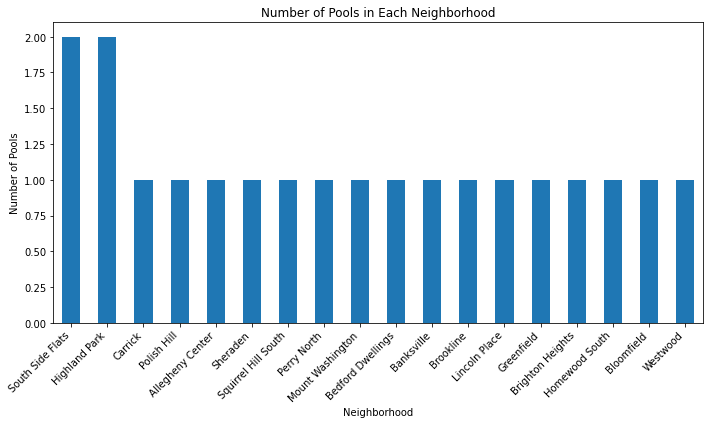

In [28]:
pools_data = data[data['type'] == 'Pool']
pool_counts = pools_data['neighborhood'].value_counts()

# Plotting the datadjdj
plt.figure(figsize=(10, 6))
pool_counts.plot(kind='bar')

plt.title('Number of Pools in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Pools')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Above is a bar graph showing the number of pools by neighboorhood. Below is a visualization with the map

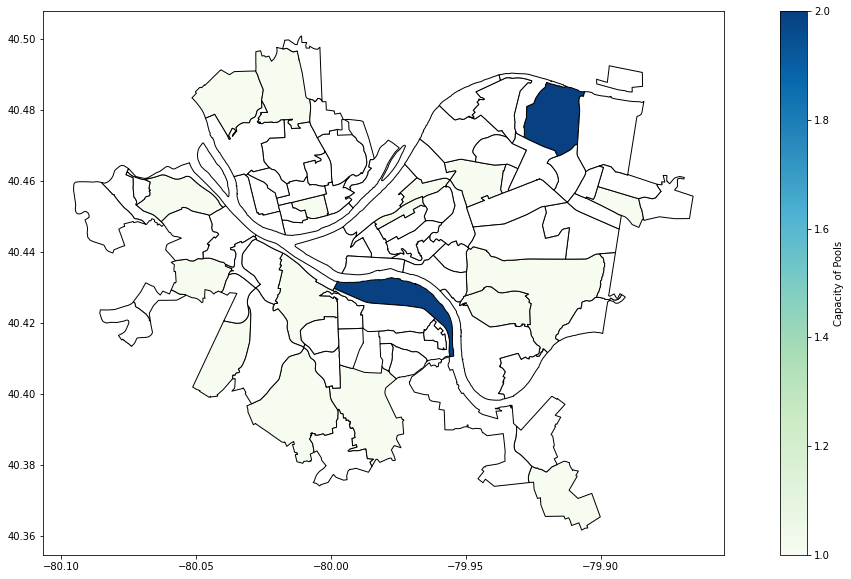

In [55]:
pools_data = data[data['type'] == 'Pool']
pool_counts = pools_data['neighborhood'].value_counts()

pool_counts = pool_counts.reset_index()
pool_counts.columns = ['neighborhood', 'count']

pool_counts['neighborhood'] = pool_counts['neighborhood'].astype(str)
neighborhoods['hood'] = neighborhoods['hood'].astype(str)
pool_counts_map = neighborhoods.merge(pool_counts, how='left', left_on='hood', right_on='neighborhood')
pool_counts_map.plot(column='count', 
               cmap='GnBu',              
               edgecolor="black",        
               legend=True,              
               legend_kwds={'label': "Capacity of Pools"}, 
               figsize=(20, 10),        
               missing_kwds={"color": "white"} 
               )

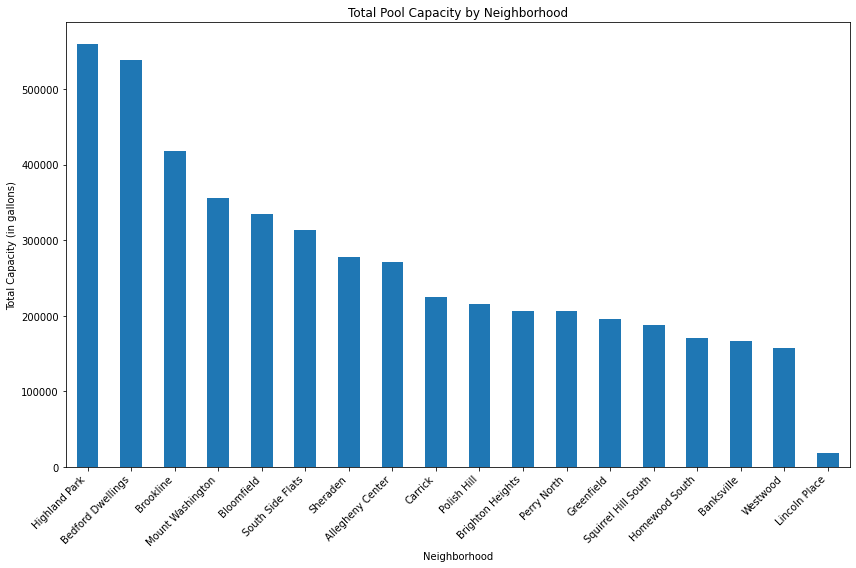

In [26]:

pools_data = data[data['type'] == 'Pool']

# Summarizing the pool capacities by neighborhood
pool_capacity_by_neighborhood = pools_data.groupby('neighborhood')['capacity'].sum()

# Sorting the result for better visualization
sorted_pool_capacity = pool_capacity_by_neighborhood.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sorted_pool_capacity.plot(kind='bar')
plt.title('Total Pool Capacity by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Total Capacity (in gallons)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

Above is a bar graph showing the pool capacity by neighboorhood. Below is a visualization with the map

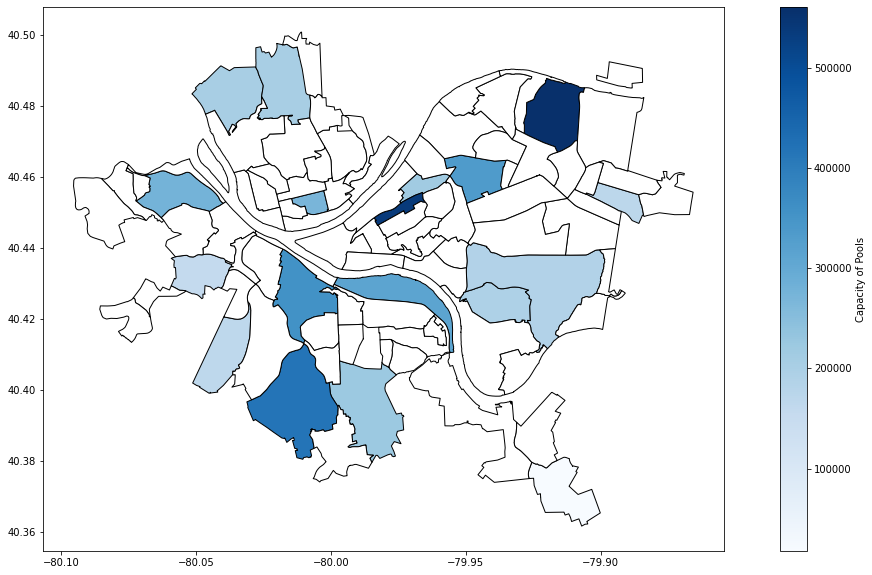

In [27]:
capacity_map = neighborhoods.merge(pool_capacity_by_neighborhood, how='left', left_on='hood', right_on='neighborhood')
capacity_map.plot(column='capacity', 
               cmap='Blues',              
               edgecolor="black",        
               legend=True,              
               legend_kwds={'label': "Capacity of Pools"}, 
               figsize=(20, 10),        
               missing_kwds={"color": "white"} 
               )

In conclusion, Highland Park is the best neighboorhood for pools, being tied for the most amount of pools and having the largest pool capacity.